<a href="https://colab.research.google.com/github/aayushkubb/Deep_Learning_Tutorial/blob/master/CIFAR_Dataset_With_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import the Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


### Load the Dataset and Prepare testing and training data

In [ ]:
from keras.datasets import cifar10

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [ ]:
print(x_train.shape)
print(x_test.shape)


### Change the Datatype to Float and Normalize it

In [ ]:
x_train=x_train.astype('float64')/255
x_test=x_test.astype('float64')/255

In [ ]:
x_train.dtype


In [ ]:
print(y_train.shape)
print(y_test.shape)

## Do the one hot Encoding of the Dependent Variable using Keras.utils

In [ ]:
from keras.utils import np_utils
from keras.utils import to_categorical

In [ ]:
num_classes= len(np.unique(y_train))

In [ ]:
num_classes

In [ ]:
print(y_train)
len(y_train)

In [ ]:
y_train= to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)


### Divide the Training Dataset into  validation and Training

In [ ]:
(y_train, y_valid) = y_train[5000:], y_train[:5000]
(x_train, x_valid) = x_train[5000:], x_train[:5000]

In [ ]:
print(y_train.shape)
print(x_train.shape)

NameError: name 'y_train' is not defined

In [ ]:
print(y_valid.shape)
print(x_valid.shape)


NameError: name 'y_valid' is not defined

### Import the Deep Learning Libraries

In [ ]:
import tensorflow as tf
  

In [ ]:
tf.__version__

'2.2.0'

### Build a CNN Architecture with Tensorflow

In [ ]:
model= tf.keras.Sequential()

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))



In [ ]:
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 16)          2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 16)          0         
Total params: 5,088
Trainable params: 5,088
Non-trainable params: 0
______________________________________________________

In [ ]:
model.add(tf.keras.layers.Flatten())

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 16)          2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

### Stack an ANN on top of CNN

In [ ]:
model.add(tf.keras.layers.Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(tf.keras.layers.Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(tf.keras.layers.Dense(units=512,activation='relu',kernel_initializer='uniform'))

In [ ]:
model.add(tf.keras.layers.Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(tf.keras.layers.Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(tf.keras.layers.Dense(units=512,activation='relu',kernel_initializer='uniform'))

In [ ]:
model.add(tf.keras.layers.Dense(units=10,activation='softmax',kernel_initializer='uniform'))

In [ ]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 16)          2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

### Fit the model

In [ ]:
answers=model.fit(x_train,y_train,validation_data=(x_valid,y_valid),shuffle=True,epochs=10,verbose=2,batch_size=500)

Epoch 1/10
90/90 - 16s - loss: 2.2747 - accuracy: 0.1198 - val_loss: 2.0853 - val_accuracy: 0.1982
Epoch 2/10
90/90 - 16s - loss: 1.9473 - accuracy: 0.2209 - val_loss: 1.8934 - val_accuracy: 0.2322
Epoch 3/10
90/90 - 14s - loss: 1.7968 - accuracy: 0.2859 - val_loss: 1.7837 - val_accuracy: 0.3082
Epoch 4/10
90/90 - 15s - loss: 1.6869 - accuracy: 0.3437 - val_loss: 1.6695 - val_accuracy: 0.3568
Epoch 5/10
90/90 - 17s - loss: 1.6057 - accuracy: 0.3858 - val_loss: 1.6137 - val_accuracy: 0.3914
Epoch 6/10
90/90 - 15s - loss: 1.5234 - accuracy: 0.4302 - val_loss: 1.5191 - val_accuracy: 0.4344
Epoch 7/10
90/90 - 15s - loss: 1.4559 - accuracy: 0.4619 - val_loss: 1.4247 - val_accuracy: 0.4778
Epoch 8/10
90/90 - 15s - loss: 1.4076 - accuracy: 0.4814 - val_loss: 1.4209 - val_accuracy: 0.4794
Epoch 9/10
90/90 - 15s - loss: 1.3547 - accuracy: 0.5045 - val_loss: 1.3543 - val_accuracy: 0.5132
Epoch 10/10
90/90 - 16s - loss: 1.3127 - accuracy: 0.5198 - val_loss: 1.3269 - val_accuracy: 0.5192


### Evaluate the Results

In [ ]:
results=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 5ms/step - loss: 1.3413 - accuracy: 0.5075


In [ ]:
results

[1.3413255214691162, 0.5074999928474426]

In [ ]:
answers.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

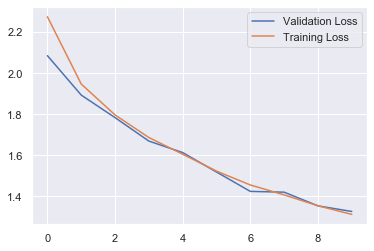

In [ ]:
plt.plot(answers.history['val_loss'],label='Validation Loss');
plt.plot(answers.history['loss'],label='Training Loss');
plt.legend();

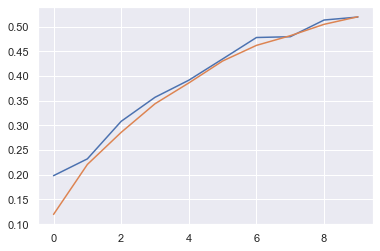

In [ ]:
plt.plot(answers.history['val_accuracy'],label='Validation Accuracy');
plt.plot(answers.history['accuracy'],label='Training Accuracy');
plt.legend;